In [260]:
import MySQLdb
import numpy as np
import pandas as pd
import random

# Fetch data from DB

In [261]:
conn = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="root",  # your password
                     db="employees")        # name of the data base


In [262]:
sql = """select e.emp_no, title, d.dept_name, s.salary, e.first_name, e.last_name
 from employees e, titles t, salaries s, departments d, dept_emp de
 where e.emp_no = t.emp_no 
       and e.emp_no = s.emp_no 
       and e.emp_no=de.emp_no 
       and de.dept_no = d.dept_no 
       and s.to_date = '9999-01-01' 
       and t.to_date = '9999-01-01' 
       and de.to_date = '9999-01-01'
       and dept_name='Development'
 order by 1
 limit 1000
;"""

df = pd.read_sql(sql, conn, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)

df

,emp_no,title,dept_name,salary,first_name,last_name
0,10001,Senior Engineer,Development,88958,Georgi,Facello
1,10006,Senior Engineer,Development,59755,Anneke,Preusig
2,10012,Senior Engineer,Development,54423,Patricio,Bridgland
3,10014,Engineer,Development,60598,Berni,Genin
4,10022,Engineer,Development,41348,Shahaf,Famili
5,10023,Engineer,Development,50113,Bojan,Montemayor
6,10027,Senior Engineer,Development,46145,Divier,Reistad
7,10031,Senior Engineer,Development,56689,Karsten,Joslin
8,10037,Senior Engineer,Development,60574,Pradeep,Makrucki
9,10043,Senior Engineer,Development,77659,Yishay,Tzvieli


# Get Salary Boundaries

In [240]:
boundaries = pd.read_excel('C:\Users\mwu\Documents\mySQL\Project\Project Guidline.xlsx',sheetname='Bundaries')
boundaries

,Department,Title,Lower Bundary,Upper Bundary
0,Development,Engineer,72827.333333,106805.666667
1,Development,Technique Leader,74070.000000,109252.000000
2,Development,Senior Staff,65653.333333,92191.666667
3,Development,Staff,64648.666667,90182.333333
4,Development,Manager,51503.333333,63006.666667
5,Development,Senior Engineer,72827.333333,106805.666667
6,Development,Assistant Engineer,70470.666667,102091.333333


In [241]:
df1=df.merge(boundaries, left_on=['title','dept_name'], right_on=['Title','Department'])
df1.head(5)

,emp_no,title,dept_name,salary,first_name,last_name,Department,Title,Lower Bundary,Upper Bundary
0,10001,Senior Engineer,Development,88958,Georgi,Facello,Development,Senior Engineer,72827.333333,106805.666667
1,10006,Senior Engineer,Development,59755,Anneke,Preusig,Development,Senior Engineer,72827.333333,106805.666667
2,10012,Senior Engineer,Development,54423,Patricio,Bridgland,Development,Senior Engineer,72827.333333,106805.666667
3,10027,Senior Engineer,Development,46145,Divier,Reistad,Development,Senior Engineer,72827.333333,106805.666667
4,10031,Senior Engineer,Development,56689,Karsten,Joslin,Development,Senior Engineer,72827.333333,106805.666667


# Get Salary Cap

In [263]:
def get_cap(row):
    if row['salary'] < row['Lower Bundary']:
        return 0.08
    elif row['salary'] < row['Upper Bundary']:
        return 0.05
    else:
        return 0.03


In [265]:
df1

,emp_no,title,dept_name,salary,first_name,last_name,Department,Title,Lower Bundary,Upper Bundary,cap,performance,performance_pct,raise_pct,raise_amt,suggested_salary
0,10001,Senior Engineer,Development,88958,Georgi,Facello,Development,Senior Engineer,72827.333333,106805.666667,0.05,4,0.4,0.01860,1654.61880,90612.61880
1,10006,Senior Engineer,Development,59755,Anneke,Preusig,Development,Senior Engineer,72827.333333,106805.666667,0.08,4,0.4,0.02976,1778.30880,61533.30880
2,10012,Senior Engineer,Development,54423,Patricio,Bridgland,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,3239.25696,57662.25696
3,10027,Senior Engineer,Development,46145,Divier,Reistad,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,2746.55040,48891.55040
4,10031,Senior Engineer,Development,56689,Karsten,Joslin,Development,Senior Engineer,72827.333333,106805.666667,0.08,3,0.6,0.04464,2530.59696,59219.59696
5,10037,Senior Engineer,Development,60574,Pradeep,Makrucki,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,3605.36448,64179.36448
6,10043,Senior Engineer,Development,77659,Yishay,Tzvieli,Development,Senior Engineer,72827.333333,106805.666667,0.05,4,0.4,0.01860,1444.45740,79103.45740
7,10056,Senior Engineer,Development,74722,Brendon,Bernini,Development,Senior Engineer,72827.333333,106805.666667,0.05,2,0.8,0.03720,2779.65840,77501.65840
8,10057,Senior Engineer,Development,68061,Ebbe,Callaway,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,4050.99072,72111.99072
9,10062,Senior Engineer,Development,68559,Anoosh,Peyn,Development,Senior Engineer,72827.333333,106805.666667,0.08,3,0.6,0.04464,3060.47376,71619.47376


In [264]:
df1['cap'] = df1.apply(get_cap, axis=1)
df1[['emp_no','cap']].groupby(['cap']).agg(['count'])

,emp_no
,count
cap,
0.03,8
0.05,325
0.08,667


# Calculate Suggested Salary

In [244]:
random.seed(0)
company_performance = 0.93
df1['performance'] = df1.apply(lambda x: random.randint(1,4), axis=1)
df1['performance_pct'] = df1.apply(lambda x: 1-0.2 * (x['performance']-1), axis=1)
df1['raise_pct'] = df1.apply(lambda x: x['cap'] * x['performance_pct']*company_performance, axis=1)
df1['raise_amt'] = df1.apply(lambda x: x['salary'] * x['raise_pct'], axis=1)
df1['suggested_salary'] = df1.apply(lambda x: x['salary'] + x['raise_amt'], axis=1)

In [245]:
df1.head()

,emp_no,title,dept_name,salary,first_name,last_name,Department,Title,Lower Bundary,Upper Bundary,cap,performance,performance_pct,raise_pct,raise_amt,suggested_salary
0,10001,Senior Engineer,Development,88958,Georgi,Facello,Development,Senior Engineer,72827.333333,106805.666667,0.05,4,0.4,0.01860,1654.61880,90612.61880
1,10006,Senior Engineer,Development,59755,Anneke,Preusig,Development,Senior Engineer,72827.333333,106805.666667,0.08,4,0.4,0.02976,1778.30880,61533.30880
2,10012,Senior Engineer,Development,54423,Patricio,Bridgland,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,3239.25696,57662.25696
3,10027,Senior Engineer,Development,46145,Divier,Reistad,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,2746.55040,48891.55040
4,10031,Senior Engineer,Development,56689,Karsten,Joslin,Development,Senior Engineer,72827.333333,106805.666667,0.08,3,0.6,0.04464,2530.59696,59219.59696
5,10037,Senior Engineer,Development,60574,Pradeep,Makrucki,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,3605.36448,64179.36448
6,10043,Senior Engineer,Development,77659,Yishay,Tzvieli,Development,Senior Engineer,72827.333333,106805.666667,0.05,4,0.4,0.01860,1444.45740,79103.45740
7,10056,Senior Engineer,Development,74722,Brendon,Bernini,Development,Senior Engineer,72827.333333,106805.666667,0.05,2,0.8,0.03720,2779.65840,77501.65840
8,10057,Senior Engineer,Development,68061,Ebbe,Callaway,Development,Senior Engineer,72827.333333,106805.666667,0.08,2,0.8,0.05952,4050.99072,72111.99072
9,10062,Senior Engineer,Development,68559,Anoosh,Peyn,Development,Senior Engineer,72827.333333,106805.666667,0.08,3,0.6,0.04464,3060.47376,71619.47376


# Output Suggested Salary

In [266]:
df2 = df1[['emp_no', 'first_name','last_name','title', 'dept_name' , 'salary', 'raise_pct', 'raise_amt', 'suggested_salary']]
df2.to_excel('C:\Users\mwu\Documents\mySQL\Project\salary.xlsx',sheet_name='Suggested Salary', index=False)

# Perform Salary Change in DB

In [267]:
new = pd.read_excel('C:\Users\mwu\Documents\mySQL\Project\salary.xlsx')
new.shape

(1000, 14)

In [268]:
cursor = conn.cursor()
sql_update = "UPDATE salaries SET to_date = curdate() WHERE emp_no = %s and to_date='9999-01-01';"
cursor.executemany(sql_update, new['emp_no'].tolist())



1000L

In [269]:
sql_insert = "INSERT INTO salaries (emp_no, salary, from_date, to_date) values (%s, %s, curdate(), '9999-01-01')"
cursor.executemany(sql_insert, new[['emp_no','suggested_salary']].values.tolist())

1000L

In [270]:
conn.commit()

In [252]:
# rollback only if you want to abandon all operations! Can't rollback after commit
# conn.rollback() 

In [271]:
conn.close()

# Report

In [254]:
import matplotlib.pyplot as plt
%matplotlib inline

## Salary Increase (Bar Chart)

In [272]:
grouped = new.groupby(['title'])
agg = grouped.agg({'raise_amt':'mean','raise_pct':'mean'}).reset_index()
agg

,title,raise_pct,raise_amt
0,Assistant Engineer,0.045437,2497.083958
1,Engineer,0.049317,2983.188977
2,Senior Engineer,0.043857,3029.409045
3,Senior Staff,0.044175,2820.118515
4,Staff,0.039680,2055.483520
5,Technique Leader,0.047694,3109.404985


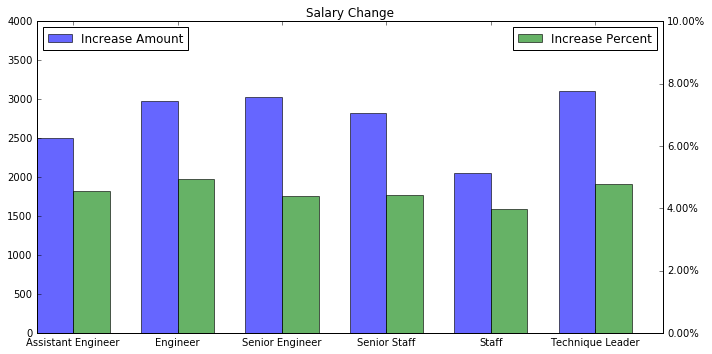

In [256]:
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = agg.shape[0]

 
# create plot
fig, ax1 = plt.subplots(figsize=(10,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.6



plt.bar(index, agg['raise_amt'].tolist(), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Increase Amount')
plt.legend(loc='upper left')
ax1.set_ylim(0,4000)


ax2 = ax1.twinx()
plt.bar(index + bar_width, agg['raise_pct'].tolist(), bar_width,
                 alpha=opacity,
                 color='g',
                 label='Increase Percent')
 
plt.title('Salary Change')
plt.xticks(index + bar_width, agg.title)
plt.legend(loc='upper right')
ax2.set_ylim(0,0.1)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
 
plt.tight_layout()
plt.show()

## New Salary (Box Plot)

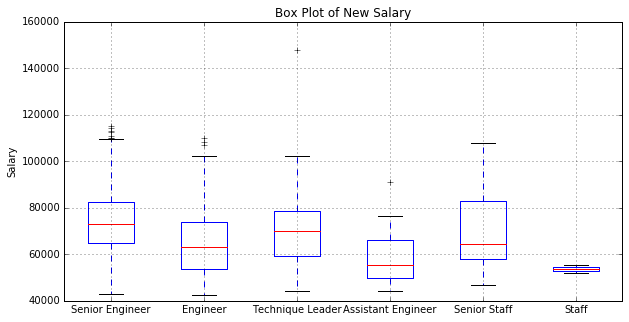

In [257]:
fig = plt.figure(figsize=(10,5))
# ax = fig.add_subplot(111)

grouped = new[['suggested_salary']].groupby(new['title'])
grouped.boxplot(subplots=False, column=new['title'].unique().tolist())
plt.title('Box Plot of New Salary')
plt.ylabel('Salary')

plt.show()


## New Salary Distribution by Tier

In [258]:
def get_tier(row):
    if row['salary'] < row['Lower Bundary']:
        return 1
    elif row['salary'] < row['Upper Bundary']:
        return 2
    else:
        return 3

dis=new.merge(boundaries, left_on=['title'], right_on=['Title'])
dis['tier'] = df1.apply(get_tier, axis=1)
dis_agg = (dis.groupby(['title','tier'])
              .agg({'emp_no':'count'})
             .groupby(level=0).apply(lambda x: x/x.sum())
             .reset_index()
             .rename(columns={'emp_no':'pct'}))

dis_agg_pivot = dis_agg.pivot('title','tier').reset_index()
dis_agg_pivot


title       pct                    
tier                             1         2         3
0     Assistant Engineer  0.885714  0.114286       NaN
1               Engineer  0.798354  0.201646       NaN
2        Senior Engineer  0.595960  0.393939  0.010101
3           Senior Staff  0.625000  0.312500  0.062500
4                  Staff  1.000000       NaN       NaN
5       Technique Leader  0.688073  0.302752  0.009174

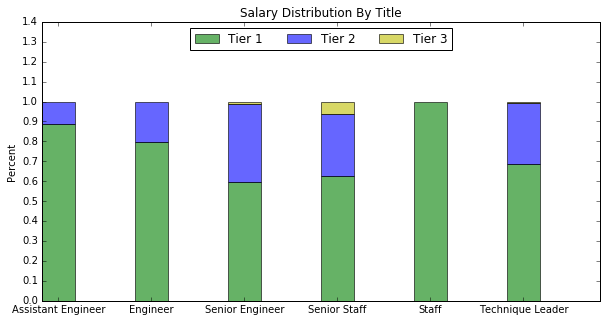

In [274]:
ind = np.arange(dis_agg_pivot.shape[0])    # the x locations for the groups

fig = plt.figure(figsize=(10,5))
width = 0.35       # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind, dis_agg_pivot.ix[:,1], width, color='g', alpha=0.6)
p2 = plt.bar(ind, dis_agg_pivot.ix[:,2], width, color='b', bottom = dis_agg_pivot.ix[:,1], alpha=0.6)
p3 = plt.bar(ind, dis_agg_pivot.ix[:,3], width, color='y', bottom=[i+j for i,j in zip(dis_agg_pivot.ix[:,1], dis_agg_pivot.ix[:,2])], alpha=0.6) 

plt.ylabel('Percent')
plt.title('Salary Distribution By Title')
plt.xticks(ind + width/2., dis_agg_pivot['title'].unique().tolist())
plt.yticks(np.arange(0, 1.5, 0.1))
plt.legend((p1[0], p2[0], p3[0]), ('Tier 1', 'Tier 2','Tier 3'), loc='upper center', ncol=3)

plt.show()